In [3]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load args
with open("../args.json", "r") as f:
    args = json.load(f)

In [5]:
# load similarity graph
path_graph = f'{args["results"]}graph/graph_{args["slice_type"]}.json'
with open(path_graph, "r") as f:
    graph = json.load(f)

In [90]:
def get_distances_from_graph(graph):
    distances = []
    slices = list(graph.keys())
    for slice in slices:
        I = list(graph[slice].keys())
        for i in I:
            topic_distances = graph[slice][i].values()
            for dist in topic_distances:
                distances.append(dist)
    distances = distances
    return distances

In [89]:
def cum_dist(array):
    serie = pd.Series(array)
    cum_dist = []
    cum = 0
    sorted_serie = serie.sort_values(ascending=True)
    for elem in sorted_serie:
        cum+=elem
        cum_dist.append(cum)
    cum_dist = pd.Series([elem/cum_dist[-1] for elem in cum_dist])
    return cum_dist

In [92]:
distances = get_distances_from_graph(graph)
sorted_distances = pd.Series(distances).sort_values(ascending=True)
cum_dist = cum_dist(distances)

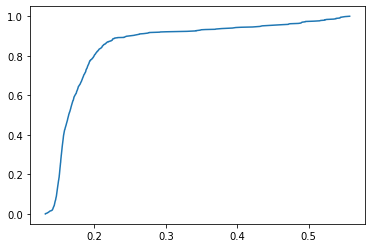

In [93]:
plt.plot(sorted_distances, cum_dist)

In [11]:
distances.describe()

count    1719.000000
mean        0.175590
std         0.055493
min         0.131223
25%         0.151192
50%         0.158587
75%         0.181265
max         0.557220
dtype: float64

In [13]:
distances.quantile(q=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

0.05    0.143318
0.10    0.146127
0.20    0.149623
0.30    0.152383
0.40    0.154845
0.50    0.158587
0.60    0.165697
0.70    0.174885
0.80    0.187775
0.90    0.206157
0.95    0.241383
0.99    0.490850
dtype: float64

In [156]:
def get_network_data(graph):
    
    # nodes
    slices = list(graph.keys())
    nodes = []
    for slice in slices:
        I = list(graph[slice].keys())
        for i in I:
            nodes.append([int(slice), int(i)])
    J = list(graph[slice][i].keys())
    for j in J:
        nodes.append([int(slice)+1, int(j)])
    nodes = np.array(nodes)
    
    # edges
    edges = []
    slices = list(graph.keys())
    for slice in slices:
        I = list(graph[slice].keys())
        for i in I:
            J = list(graph[slice][i].keys())
            for j in J:
                x  = [int(slice), int(slice)+1, None]
                y  = [int(i), int(j), None]
                similarity = graph[slice][i][j]
                edges.append((x, y, similarity))         
      
    return nodes, edges  

In [177]:
def make_edge(x, y, text, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = text,
                       mode      = 'lines')
def plot_network(nodes, edges, threshold):
    """
    """
    # create node trace
    node_trace = go.Scatter(x = nodes[:,0], y = nodes[:,1],
                        mode = 'markers',
                        hoverinfo = 'text',
                        marker = dict(
                            showscale = True,
                            colorscale = 'YlGnBu',
                            reversescale = True,
                            color = [],
                            size = 10,
                            colorbar = dict(
                                thickness = 15,
                                title = 'Node Connections',
                                xanchor = 'left',
                                titleside = 'right'
                            ),
                        line_width = 2))
    # create edge traces
    edge_trace = []
    for edge in edges:
        x = edge[0]
        y = edge[1]
        similarity = edge[2]
        if similarity >= threshold:
            trace = make_edge(x, y, text, width = similarity) #f"{round(similarity,3)}"
            edge_trace.append(trace)
        
    # layout
    layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)', 
    plot_bgcolor='rgba(0,0,0,0)', 
    xaxis =  {'showgrid': False, 'zeroline': False}, 
    yaxis = {'showgrid': False, 'zeroline': False},
    )
    # create figure
    fig = go.Figure(layout = layout)
    # add all edge traces
    for trace in edge_trace:
        fig.add_trace(trace)
    # add node trace
    fig.add_trace(node_trace)
    # remove legend
    fig.update_layout(showlegend = False)
    # tick labels
    fig.update_xaxes(showgrid=False, zeroline=False, showticklabels=True, tickvals=list(range(1,nodes.max()+1,1)))
    fig.update_yaxes(showticklabels = False)
    # show figure
    fig.show()


In [164]:
nodes, edges = get_network_data(graph)

In [183]:
plot_network(nodes, edges,  0.146127)